# YOUR PROJECT TITLE

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import datetime

import pandas_datareader # install with `pip install pandas-datareader`

In [9]:
# Reading SMIT4
# Import data
SMIT4 = 'SMIT4.xlsx'

# Read data
pd.read_excel(SMIT4).head(10)

# Cleaning SMIT4
# Remove the first column and first two rows which contain no information
SMIT4 = pd.read_excel(SMIT4, skiprows=2)
SMIT4.drop('Unnamed: 0', axis=1, inplace=True)

# Rename new column 1
SMIT4.rename(columns = {'Unnamed: 1':'Municipality'}, inplace=True)

# Drop the last two column which contain no information
SMIT4 = SMIT4.drop([100, 101])

# Dropping the row Christiansø since it is not actually a municipality 
SMIT4 = SMIT4.loc[SMIT4.Municipality.str.contains('Christiansø') == False] # keep everything else

# Resetting index
SMIT4.reset_index(inplace = True, drop = True) # Drop old index too
SMIT4_sorted = SMIT4.drop(SMIT4.iloc[:, 1:104], axis=1, inplace=False)


SMIT4_sorted.head(99)

,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D20,2021M06D21,2021M06D22,2021M06D23,2021M06D24,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29
0,All Denmark,311.0,315.0,320.0,325.0,330.0,336.0,342.0,348.0,353.0,...,5009.0,5011.0,5014.0,5018.0,5021.0,5025.0,5028.0,5031.0,5034.0,5038.0
1,Copenhagen,544.0,556.0,566.0,578.0,587.0,599.0,611.0,625.0,637.0,...,8326.0,8331.0,8338.0,8350.0,8356.0,8367.0,8375.0,8383.0,8391.0,8406.0
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7509.0,7515.0,7520.0,7533.0,7540.0,7553.0,7562.0,7577.0,7583.0,7593.0
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7639.0,7641.0,7644.0,7646.0,7648.0,7648.0,7651.0,7653.0,7653.0,7653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,3042.0,3042.0,3062.0,3062.0,3062.0,3062.0,3062.0,3062.0,3067.0,3067.0
95,Rebild,80.0,80.0,80.0,80.0,80.0,83.0,86.0,93.0,103.0,...,3191.0,3191.0,3198.0,3198.0,3198.0,3201.0,3201.0,3201.0,3201.0,3201.0
96,Thisted,117.0,117.0,136.0,143.0,145.0,145.0,147.0,147.0,150.0,...,3137.0,3137.0,3137.0,3137.0,3141.0,3141.0,3141.0,3141.0,3141.0,3141.0
97,Vesthimmerlands,221.0,221.0,221.0,221.0,226.0,226.0,229.0,229.0,229.0,...,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2608.0,2608.0


In [12]:
date_rng = pd.date_range(start='2020-09-07', end='2021-06-29', freq='D')
val = SMIT4_sorted.loc[SMIT4_sorted['Municipality'] == 'Copenhagen', :].values

data = pd.DataFrame(date_rng, val)

# Example data, replace with your own


# Set the 'date' column as the index of the DataFrame
data.set_index('date', inplace=True)

# Create a time series plot
data.plot(kind='line', y='value', figsize=(10, 6))  # Plot the data
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('Time Series Plot')  # Set plot title
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

plt.plot(date_rng, val)

ValueError: Shape of passed values is (296, 1), indices imply (1, 1)

In [54]:
# Reading BEV107
BEV107 = 'BEV107.xlsx'

# Read data
pd.read_excel(BEV107).head(10)

# Cleaning Bev107
# Remove the first column and first two rows which contain no information
BEV107 = pd.read_excel(BEV107, skiprows=2)
BEV107.drop('Unnamed: 0', axis=1, inplace=True)

# Rename new column 1
BEV107.rename(columns = {'Unnamed: 1': 'Municipality', '2022': 'pop2022'}, inplace=True)


# Drop the last two column which contain no information
BEV107 = BEV107.drop([99, 100])

# Dropping the row Christiansø since it is not actually a municipality 
BEV107 = BEV107.loc[BEV107.Municipality.str.contains('Christiansø') == False] # keep everything else

# Resetting index
BEV107.reset_index(inplace = True, drop = True) # Drop old index too

# calculate column sums and add as new row
new_row = BEV107.iloc[:, 1:].sum(axis=0)
new_row['Municipality'] = 'All Denmark'
BEV107 = BEV107.append(new_row, ignore_index=True)

last_index = BEV107.index[-1]
BEV107 = BEV107.loc[[last_index] + list(range(last_index)) + list(range(last_index+1, len(BEV107)))].reset_index(drop=True)

BEV107.head(99)

/var/folders/95/jtdfn9755t7fddy0wly4sgtr0000gn/T/ipykernel_50446/2368396444.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BEV107 = BEV107.append(new_row, ignore_index=True)


,Municipality,pop2022
0,All Denmark,5873327.0
1,Copenhagen,644431.0
2,Frederiksberg,103608.0
3,Dragør,14640.0
4,Tårnby,42723.0
...,...,...
94,Morsø,20068.0
95,Rebild,30646.0
96,Thisted,43089.0
97,Vesthimmerlands,36326.0


In [55]:
SMIT4_sorted['Mean'] = SMIT4_sorted.mean(axis=1).astype(int)
SMIT4_sorted['Median'] = SMIT4_sorted.median(axis=1).astype(int)
SMIT4_sorted['Min'] = SMIT4_sorted.min(axis=1).astype(int)
SMIT4_sorted['Max'] = SMIT4_sorted.max(axis=1).astype(int)




/var/folders/95/jtdfn9755t7fddy0wly4sgtr0000gn/T/ipykernel_50446/844818502.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SMIT4_sorted['Mean'] = SMIT4_sorted.mean(axis=1).astype(int)
/var/folders/95/jtdfn9755t7fddy0wly4sgtr0000gn/T/ipykernel_50446/844818502.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SMIT4_sorted['Median'] = SMIT4_sorted.median(axis=1).astype(int)
/var/folders/95/jtdfn9755t7fddy0wly4sgtr0000gn/T/ipykernel_50446/844818502.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling 

In [56]:
SMIT4_sorted.head(200)


,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D24,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29,Mean,Median,Min,Max
0,All Denmark,311.0,315.0,320.0,325.0,330.0,336.0,342.0,348.0,353.0,...,5021.0,5025.0,5028.0,5031.0,5034.0,5038.0,2877,3417,311,5038
1,Copenhagen,544.0,556.0,566.0,578.0,587.0,599.0,611.0,625.0,637.0,...,8356.0,8367.0,8375.0,8383.0,8391.0,8406.0,4830,5777,544,8406
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7540.0,7553.0,7562.0,7577.0,7583.0,7593.0,4397,5380,552,7593
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,3521,4443,221,6327
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7648.0,7648.0,7651.0,7653.0,7653.0,7653.0,4494,5455,354,7653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,3062.0,3062.0,3062.0,3062.0,3067.0,3067.0,1806,2302,99,3067
95,Rebild,80.0,80.0,80.0,80.0,80.0,83.0,86.0,93.0,103.0,...,3198.0,3201.0,3201.0,3201.0,3201.0,3201.0,1680,2056,80,3201
96,Thisted,117.0,117.0,136.0,143.0,145.0,145.0,147.0,147.0,150.0,...,3141.0,3141.0,3141.0,3141.0,3141.0,3141.0,1728,2038,117,3141
97,Vesthimmerlands,221.0,221.0,221.0,221.0,226.0,226.0,229.0,229.0,229.0,...,2606.0,2606.0,2606.0,2606.0,2608.0,2608.0,1446,1612,221,2608


In [57]:
merge = pd.merge(SMIT4_sorted,BEV107,how='inner',on=['Municipality'])

print(f'Number of municipalities = {len(merge.Municipality.unique())}')

Number of municipalities = 99


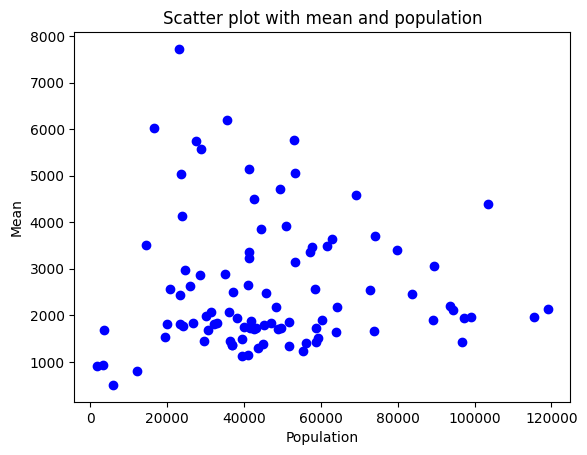

,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29,Mean,Median,Min,Max,pop2022
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7553.0,7562.0,7577.0,7583.0,7593.0,4397,5380,552,7593,103608.0
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,3521,4443,221,6327,14640.0
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7648.0,7651.0,7653.0,7653.0,7653.0,4494,5455,354,7653,42723.0
5,Albertslund,707.0,714.0,736.0,761.0,786.0,797.0,815.0,837.0,855.0,...,9711.0,9711.0,9722.0,9733.0,9751.0,5745,6837,707,9751,27599.0
6,Ballerup,525.0,535.0,537.0,545.0,549.0,562.0,570.0,578.0,588.0,...,7895.0,7897.0,7897.0,7899.0,7905.0,4718,5673,525,7905,49274.0


In [65]:
# list of municipality names to exclude
exclude_municipalities = ['All Denmark', 'Copenhagen', 'Aalborg', 'Aarhus', 'Odense']

# filter rows to exclude specific municipalities
merge = merge.loc[~merge['Municipality'].isin(exclude_municipalities)]


plt.scatter(merge['pop2022'], merge['Mean'], color='blue')

# set plot title and axes labels
plt.title('Scatter plot with mean and population')
plt.xlabel('Population')
plt.ylabel('Mean')
plt.show()
merge.head()